In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,138 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [4]:
import cv2
import pytesseract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
from google.colab import files
uploaded = files.upload()
#for uploading the image

Saving thyrocare_0_2649.jpg to thyrocare_0_2649.jpg


In [6]:
!Is# for checking the file image we take or file path

/bin/bash: line 1: Is#: command not found


In [7]:
import cv2

# Load the image
image = cv2.imread("/content/thyrocare_0_2649.jpg")

# ✅ Check if the image is loaded successfully
if image is None:
    print("Error: Could not load image. Check file path and format.")
else:
    # Bounding box coordinates (x, y, width, height)
    bounding_boxes = [(50, 30, 200, 100), (120, 80, 250, 120)]  # Example coordinates

    for i, (x, y, w, h) in enumerate(bounding_boxes):
        cropped = image[y:y+h, x:x+w]
        cv2.imwrite(f"cropped_text_{i}.jpg", cropped)

    print("Cropping completed successfully!")


Cropping completed successfully!


Image loaded successfully.


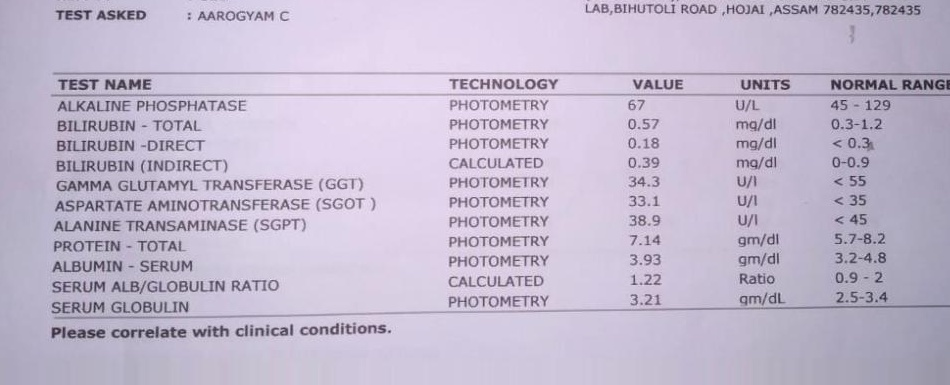

Cropped table saved at: /content/thyrocare_0_2649.jpg


In [8]:
import cv2
from IPython.display import display
import PIL.Image as Image

# Load the image
image_path = "/content/thyrocare_0_2649.jpg" # Ensure correct path
image = cv2.imread(image_path)

# Check if image is loaded correctly
if image is None:
    print("Error: Could not load image. Please check the file path or re-upload the image.")
else:
    print("Image loaded successfully.")

    # Define the bounding box (adjust based on actual table location)
    x, y, w, h = 50, 250, 950, 400  # Modify these values based on table position

    # Crop the table area
    cropped_table = image[y:y+h, x:x+w]

    # Save the cropped table image
    cropped_image_path = "/content/thyrocare_0_2649.jpg"
    cv2.imwrite(cropped_image_path, cropped_table)

    # Display the cropped table
    display(Image.open(cropped_image_path))

    print(f"Cropped table saved at: {cropped_image_path}")


In [9]:
import cv2

# YOLOv3 Bounding Box (x, y, w, h)
x, y, w, h = 100, 50, 300, 100

#
image = cv2.imread("/content/thyrocare_0_2649.jpg")
cropped_region = image[y:y+h, x:x+w]

# save the croped image
cv2.imwrite("cropped_text.jpg", cropped_region)


True

In [10]:
import cv2

#  Load the image
image = cv2.imread("/content/thyrocare_0_2649.jpg")

# ✅ Check if the image is loaded successfully
if image is None:
    print("Error: Could not load image. Check file path and format.")
else:
    # Bounding box coordinates (x, y, width, height)
    bounding_boxes = [(50, 30, 200, 100), (120, 80, 250, 120)]  # Example coordinates

    for i, (x, y, w, h) in enumerate(bounding_boxes):
        cropped = image[y:y+h, x:x+w]
        cv2.imwrite(f"cropped_text_{i}.jpg", cropped)

    print("Cropping completed successfully!")

Cropping completed successfully!


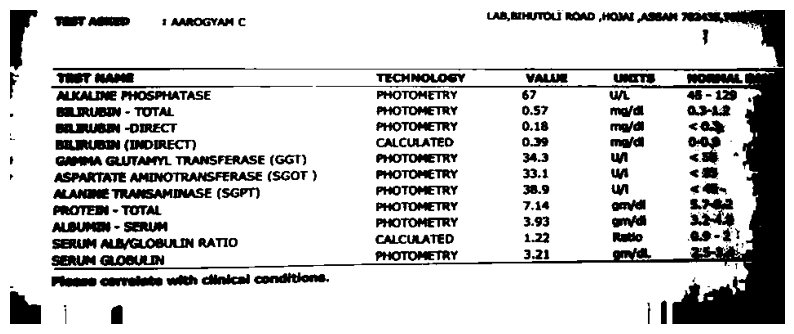

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#  1️⃣laod the image
image = cv2.imread("thyrocare_0_2649.jpg")

if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    #  2️⃣ convert the image into grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 3️⃣ Contrast (CLAHE)for clearing the contrast
    clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))  # clipLimit घटाया
    enhanced = clahe.apply(gray)

    # 4️⃣ Gaussian Blur(Sharpness) slightly gausssian blur and less the sharpness
    blurred = cv2.GaussianBlur(enhanced, (3,3), 0)

    # 5️⃣ Otsu Thresholding apply (for stopping the more blurr)
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #  6️⃣ keep the original text
    kernel = np.ones((1,1), np.uint8)  # (2,2)instead of(1,1) not more clean
    final_image = cv2.dilate(thresholded, kernel, iterations=1)

    #  7️⃣ for processed image show
    plt.figure(figsize=(10, 5))
    plt.imshow(final_image, cmap='gray')
    plt.axis("off")
    plt.show()


In [12]:
import cv2

# Load the image
image_path = "/content/thyrocare_0_2649.jpg"  # Ensure this path is correct
image = cv2.imread(image_path)

# Check if image is loaded properly
if image is None:
    print("Error: Could not load image. Please check the file path or re-upload the image.")
else:
    print("Image loaded successfully.")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Image converted to grayscale successfully.")


Image loaded successfully.
Image converted to grayscale successfully.


In [13]:
import cv2
import pytesseract
import pandas as pd
import numpy as np
import os # Import the os modul

# Load image
image_path = "/content/thyrocare_0_2649.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Detect horizontal and vertical lines using morphology operations
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 40))

detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Combine both horizontal and vertical lines to detect the table grid
table_grid = cv2.addWeighted(detect_horizontal, 0.5, detect_vertical, 0.5, 0)

# Find contours of the table cells
contours, _ = cv2.findContours(table_grid, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Sort bounding boxes row-wise (top to bottom, then left to right)
bounding_boxes = sorted(bounding_boxes, key=lambda b: (b[1], b[0]))

# Extract data from each cell
table_data = []
for x, y, w, h in bounding_boxes:
    if w > 30 and h > 15:  # Ignore small contours (noise)
        roi = gray[y:y+h, x:x+w]  # Extract the text region
        text = pytesseract.image_to_string(roi, config="--psm 6").strip()
        table_data.append(text)

# **Assuming the table has 5 columns**
num_columns = 5  # ["Test Name", "Technology", "Value", "Units", "Normal Range"]
structured_data = [table_data[i:i + num_columns] for i in range(0, len(table_data), num_columns)]

# Create DataFrame
df = pd.DataFrame(structured_data, columns=["Test Name", "Technology", "Value", "Units", "Normal Range"])

# Save to Excel
excel_path = "/content/full_extracted_table.xlsx"
df.to_excel(excel_path, index=False)

# Save to Excel
excel_path = "/content/full_extracted_table.xlsx"  # Changed path

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(excel_path), exist_ok=True)

df.to_excel(excel_path, index=False)

print(f"✅ Full Table Extracted & Saved: {excel_path}")




✅ Full Table Extracted & Saved: /content/full_extracted_table.xlsx


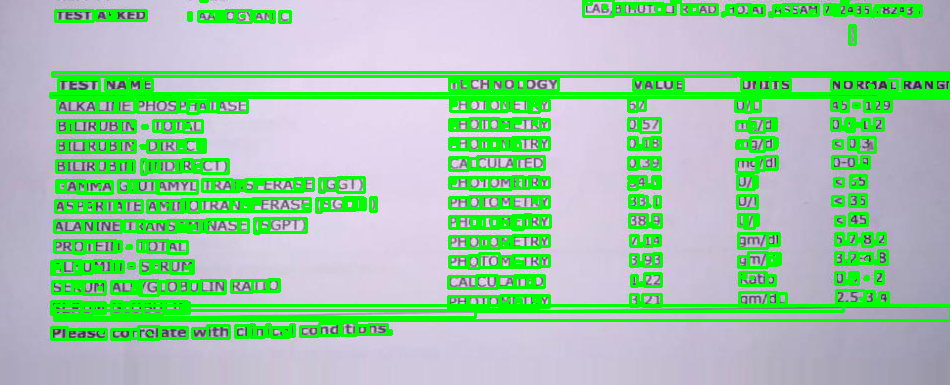

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

# Load the image
image = cv2.imread("/content/thyrocare_0_2649.jpg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected regions
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box

# Show the output using cv2_imshow instead of cv2.imshow
cv2_imshow(image) # Use cv2_imshow to display the image in Colab
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# Import the necessary library
import pytesseract

# Tesseract OCR
custom_oem_psm_config = r'--oem 3 --psm 6'
extracted_text = pytesseract.image_to_string(image, config=custom_oem_psm_config)
print("Extracted Text:\n", extracted_text)

Extracted Text:
 (ESTED | RAE a
RAO)  Fiainm of6#=£ (0  euaike
GIORUBIN = (OED nee os cee oen2
GIOROBIN -OIRECE emmy an aoe eas
GABA GICTRMYD (RAREPERARS (GGT) [os ond eu tit) mg om
GSPBRIFITS AMOTRANSPERASS (EOE eee Bo aw og
@LANINDIRANSIRINASH (SGPT) SEED) ee] @ oa
PROTEM « (OTD an BZ
G@0B0Min: GERD eaOORErED Gea ahaa e248
GERUM ALEYGUOBODIN RA) CACO oma on-o
Sa

Please correlate with Clinical condluons



In [17]:
!pip install easyocr # Install the easyocr package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [18]:
import pandas as pd


In [19]:
# text save in csv file
df = pd.DataFrame({"Detected Text": [extracted_text]})
df.to_csv("output.csv", index=False)

print("✅ Output saved as output.csv")

✅ Output saved as output.csv


In [21]:
# text from Tesseract OCR
custom_oem_psm_config = r'--oem 3 --psm 6'
extracted_text = pytesseract.image_to_string(final_image, config=custom_oem_psm_config)

# Extracted text print
print("Extracted Text:\n", extracted_text)


Extracted Text:
 VEST AGED = 1 AAROGYAM C LAB, BIHUTOU ROAD ,HOJAL ASGAM 7O24S5, 200
,
, TECHNOLOGY VALE Unis WORNAL
‘ALKALINE PHOSPHATASE PHOTOMETRY 67 A. ‘45-123,

. BILIRUBIN - TOTAL PHOTOMETRY 0s7 marl OFA

GALURUGIN -DIRECT PHOTOMETRY 0.18 maa <0%

BILIRUBIN (INDIRECT) CALCULATED 0.39 oma ong

; GABMMA GLUTAMYL TRANSFERASE (GGT) PHOTOMETRY 3 w <% *

, ASPARTATE AMINOTRANSFERASE (SGOT ) PHOTOMETRY 33.1 wa <8
ALANINE TRANSAMINASE (SGPT) PHOTOMETRY 38.9 wi <4.
PROTEIN - TOTAL PHOTOMETRY 744 avd ea
ALBUMIN - SERUM PHOTOMETRY 3.93 od 4%
SERUM ALB/GLOBULIN RATIO CALCULATED 1.22 Ratio 09-2)
SERUM GLOBULIN PHOTOMETRY 3.21

.

. Fiease correlate with clinical conditions. .

Be og if



In [22]:
# text save in csv file
df = pd.DataFrame({"Detected Text": [extracted_text]})
df.to_csv("output.csv", index=False)

print("✅ Output saved as output.csv")


✅ Output saved as output.csv


In [23]:
from google.colab import files
files.download("output.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
!pip install openpyxl


In [25]:
import pandas as pd
import re

# text save in dataframe
df = pd.DataFrame({"Detected Text": [extracted_text]})

# Illegal characters to
df['Detected Text'] = df['Detected Text'].str.replace(r'[\000-\010]|[\013-\014]|[\016-\037]', '', regex=True)

# Excel save
df.to_excel("output.xlsx", index=False)

print("✅ Output saved as output.xlsx")

✅ Output saved as output.xlsx


In [26]:
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet
!make


Cloning into 'darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 15873 (delta 13), reused 8 (delta 8), pack-reused 15845 (from 2)
Receiving objects: 100% (15873/15873), 14.50 MiB | 11.35 MiB/s, done.
Resolving deltas: 100% (10679/10679), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ []8;;https://gcc.gnu.org/onlinedocs/gcc/

In [27]:
!mkdir model


In [28]:
!mv yolov3.weights model/


mv: cannot stat 'yolov3.weights': No such file or directory


In [29]:
!./darknet detector train data/obj.data cfg/yolov3.cfg model/yolov3.weights -dont_show


 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
Couldn't open file: data/obj.data


In [30]:
!./darknet detector test data/obj.data cfg/yolov3.cfg model/yolov3_final.weights test_image.jpg


 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
Couldn't open file: data/obj.data


In [31]:
import torch
print("CUDA Available: ", torch.cuda.is_available())


CUDA Available:  True


In [32]:
!pip install opencv-python


In [33]:
!sed -i 's/OPENCV=0/OPENCV=1/g' darknet/Makefile


sed: can't read darknet/Makefile: Not a directory


In [34]:
!sed -i 's/OPENCV=0/OPENCV=1/g' darknet/Makefile
!make


sed: can't read darknet/Makefile: Not a directory
chmod +x *.sh


In [35]:
# This cell is meant to visually represent a directory structure, not execute Python code.
# To display it as a string literal, use triple quotes:
print("""
/darknet
 ├── /data
 │   ├── obj.data
 │   ├── obj.names
 │   ├── train.txt
 │   ├── test.txt
""")


/darknet
 ├── /data
 │   ├── obj.data
 │   ├── obj.names
 │   ├── train.txt
 │   ├── test.txt



In [36]:
classes = 2
# Create a string to represent the path to the training data
train = 'data/train.txt'  # 'data' is treated as a folder name within the string
classes = 2  # This line is redundant, as 'classes' is already defined above
valid = 'data/test.txt'  # Similarly, for the validation data path
names = 'data/obj.names'  # And for the names file
backup = '/content/drive/MyDrive/yolo_backup/'  # This line is fine

In [37]:
%cd darknet
!make clean
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!make


[Errno 20] Not a directory: 'darknet'
/content/darknet
rm -rf ./obj/image_opencv.o ./obj/http_stream.o ./obj/gemm.o ./obj/utils.o ./obj/dark_cuda.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/darknet.o ./obj/detection_layer.o ./obj/captcha.o ./obj/route_layer.o ./obj/writing.o ./obj/box.o ./obj/nightmare.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/coco.o ./obj/dice.o ./obj/yolo.o ./obj/detector.o ./obj/layer.o ./obj/compare.o ./obj/classifier.o ./obj/local_layer.o ./obj/swag.o ./obj/shortcut_layer.o ./obj/representation_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/rnn.o ./obj/rnn_vid.o ./obj/crnn_layer.o ./obj/demo.o ./obj/tag.o ./obj/cifar.o ./obj/go.o ./obj/b

In [38]:
!./darknet detector train data/obj.data cfg/yolov3.cfg model/yolov3.weights -dont_show -map


 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, GPU count: 1  
 OpenCV isn't used - data augmentation will be slow 
Couldn't open file: data/obj.data
